# 1. Least Square Estimation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X_and_Y = np.load('./q1-least-square.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

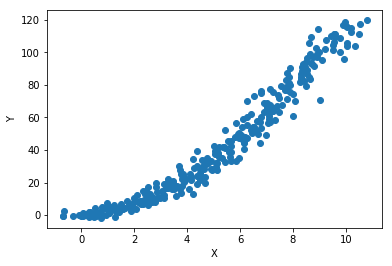

In [2]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# Assume Y = w0 + w1*X = (w0, w1).(1, X) = W.X1
# X1 contains 1 and X.
X1 = np.matrix(np.hstack((np.ones((len(X),1)), X.reshape(-1,1))))
W = X1.T.dot(X1).I.dot(X1.T).dot(Y)
w0, w1 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


In [4]:
X1.shape

(300, 2)

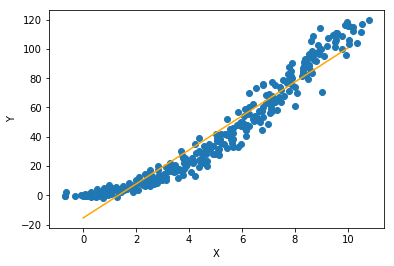

In [5]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
# Assume Y = w0 + w1*X + w2*Xˆ2 = (w0, w1, w2).(1, X, Xˆ2) = W.X2
# X2 contains 1, X and Xˆ2.
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)), X.reshape(-1,1))), X.reshape(-1,1) * X.reshape(-1, 1))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = -1.71 + 3.02*X + 0.87*Xˆ2


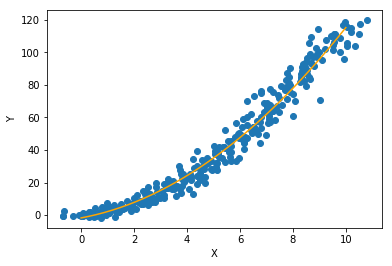

In [7]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 2. Parabola Estimation

In [8]:
X_and_Y = np.load('./q2-parabola.npy')
X = X_and_Y[:, 0] # Shape: (300,)
Y = X_and_Y[:, 1] # Shape: (300,)

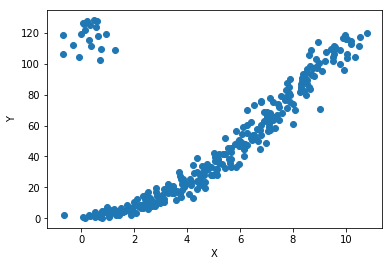

In [9]:
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (a) L2 norm

In [10]:
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)), X.reshape(-1,1))), X.reshape(-1,1) * X.reshape(-1, 1))))
W = X2.T.dot(X2).I.dot(X2.T).dot(Y)
w0, w1, w2 = np.array(W).reshape(-1)
print('Y = {:.2f} + {:.2f}*X + {:.2f}*Xˆ2'.format(w0, w1, w2))

Y = 51.07 + -16.06*X + 2.36*Xˆ2


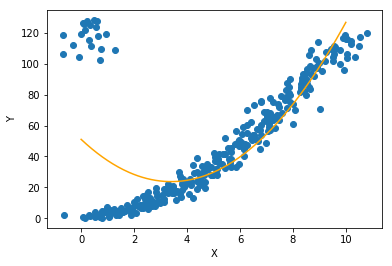

In [11]:
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### (b) L1 norm

In [12]:
def g(W,X,Y):
    return np.sum(np.abs(X.dot(W.T) - Y.reshape((Y.shape[0], 1))))

In [13]:
def gradient(W,X,Y):
    return np.sign(X.dot(W.T) - Y.reshape((Y.shape[0], 1))).T.dot(X).T

In [14]:
threshold = 0.00001
eta = 0.000001
iterations = 300000
X2 = np.matrix(np.hstack((np.hstack((np.ones((len(X),1)), X.reshape(-1,1))), X.reshape(-1,1) * X.reshape(-1, 1))))
W = np.zeros((1, X2.shape[1]))
Ls = []
for i in range(iterations):
    W -= eta * gradient(W,X2,Y).T
    Ls.append(g(W,X2,Y))
    if i >= 1 and abs(Ls[-1] - Ls[-2]) < threshold:
        break

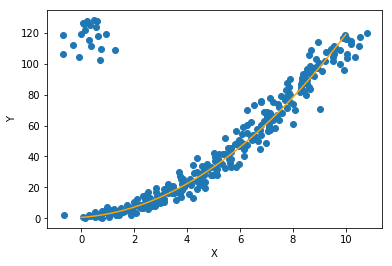

In [15]:
w0, w1, w2 = np.array(W).reshape(-1)
X_line = np.linspace(0,10,300)
Y_line = w0 + w1 * X_line + w2 * (X_line**2)
plt.scatter(X, Y)
plt.plot(X_line, Y_line, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 3. Perceptron Learning

In [188]:
from sklearn import preprocessing
import numpy as np
import pandas as pd

# load iris_train.data and iris_test.data
pd_train = pd.read_csv("iris/iris_train.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])
pd_test = pd.read_csv("iris/iris_test.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "label"])

# parse the features and labels as numpy arrays.
X_train = pd_train.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_train = pd_train.as_matrix(columns=["label"]).ravel()
X_test = pd_test.as_matrix(columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
y_test = pd_test.as_matrix(columns=["label"]).ravel()

# Encode labels
le = preprocessing.LabelEncoder()
le.fit(y_train)
print(le.classes_)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

['Iris-setosa' 'Iris-versicolor']


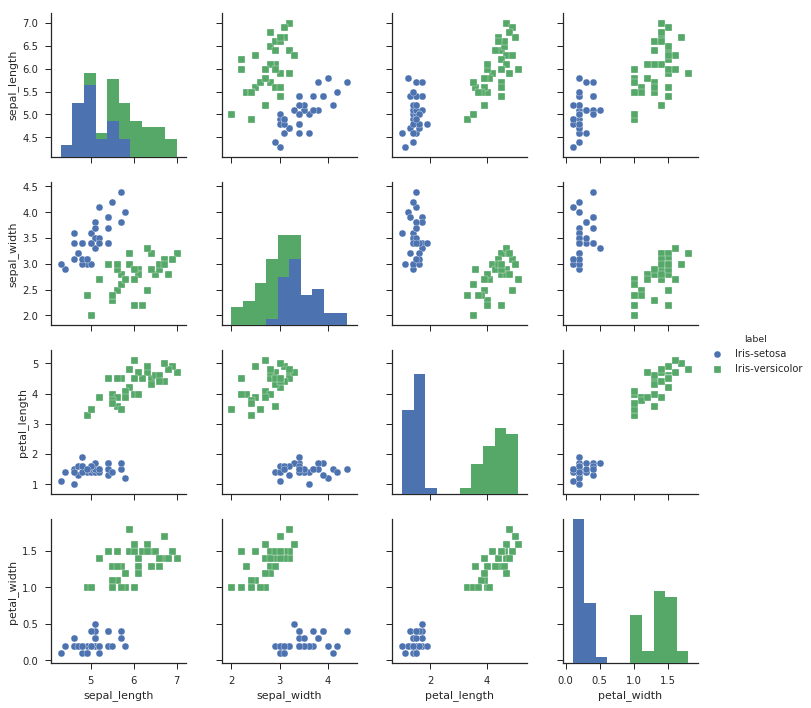

In [189]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(pd_train, hue="label", markers=["o", "s"])

In [190]:
def f(x, w, b):
    return 1 if w.dot(x) + b >= 0 else -1

In [212]:
def allCorrect(X, w, b, Y):
    for i, x in enumerate(X):
        if (f(x, w, b) == 1 and Y[i] == 1) or (f(x, w, b) == -1 and Y[i] == 0):
            continue
        else:
            return 0
    return 1

In [213]:
def correct(x, w, b, y):
    if (f(x, w, b) == 1 and y == 1) or (f(x, w, b) == -1 and y == 0):
        return 1
    else:
        return 0

In [214]:
def acc(X, w, b, Y):
    predict = X.dot(w.T) + b
    temp = [1 if ((predict[i] >= 0 and Y[i] == 1) or (predict[i] < 0 and Y[i] == 0)) else 0 for i in range(X.shape[0])]
    return sum(temp) * 1.0 / len(temp)

In [219]:
def precision(X, w, b, Y):
    predict = X.dot(w.T) + b
    truePositive = sum([1 if predict[i] >= 0 and Y[i] == 1 else 0 for i in range(X.shape[0])])
    outPositive = sum([1 if predict[i] >= 0 else 0 for i in range(X.shape[0])])
    return truePositive * 1.0 / outPositive if truePositive else 0.0

In [220]:
def recall(X, w, b, Y):
    predict = X.dot(w.T) + b
    truePositive = sum([1 if predict[i] >= 0 and Y[i] == 1 else 0 for i in range(X.shape[0])])
    conditionPositive = sum([1 if Y[i] == 1 else 0 for i in range(X.shape[0])])
    return truePositive * 1.0 / conditionPositive if truePositive else 0.0

In [221]:
def FValue(X, w, b, Y):
    p, r = precision(X, w, b, Y), recall(X, w, b, Y)
    return 2.0 * p * r / (p + r) if p and r else 0.0

In [222]:
import random

lam = 1.0
b = 0.0
w = np.zeros((1, X_train.shape[1]))
ws, bs = [], []
errs_train, errs_test = [], []
accs, pres, recs, fs = [], [], [], []

while not allCorrect(X_train, w, b, y_train):
    i = random.randint(0, X_train.shape[0]-1)
    if correct(X_train[i], w, b, y_train[i]):
        continue
    else:
        if y_train[i]:
            w += lam * (y_train[i] - f(X_train[i], w, b)) * X_train[i]
            b += lam * (y_train[i] - f(X_train[i], w, b))
        else:
            w += lam * (y_train[i] - 1 - f(X_train[i], w, b)) * X_train[i]
            b += lam * (y_train[i] - 1 - f(X_train[i], w, b))
    accs.append(acc(X_test, w, b, y_test))
    errs_train.append(1.0 - acc(X_train, w, b, y_train))
    errs_test.append(1.0 - accs[-1])
    pres.append(precision(X_test, w, b, y_test))
    recs.append(recall(X_test, w, b, y_test))
    fs.append(FValue(X_test, w, b, y_test))

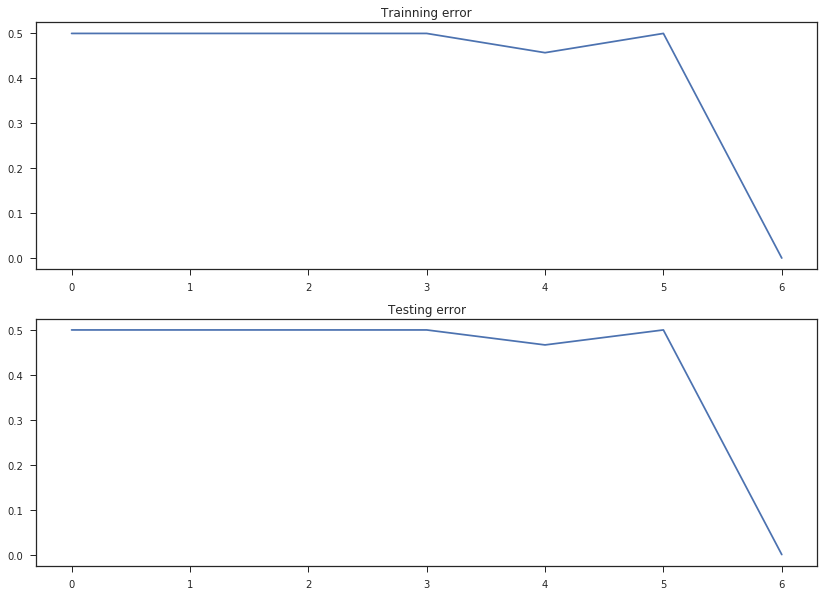

In [201]:
plt.figure(figsize=(14, 10))
t = range(len(errs_train))
ax = plt.subplot(211)
ax.set_title("Trainning error")
plt.plot(t, errs_train)

ax = plt.subplot(212)
ax.set_title("Testing error")
plt.plot(t, errs_test)
plt.show()

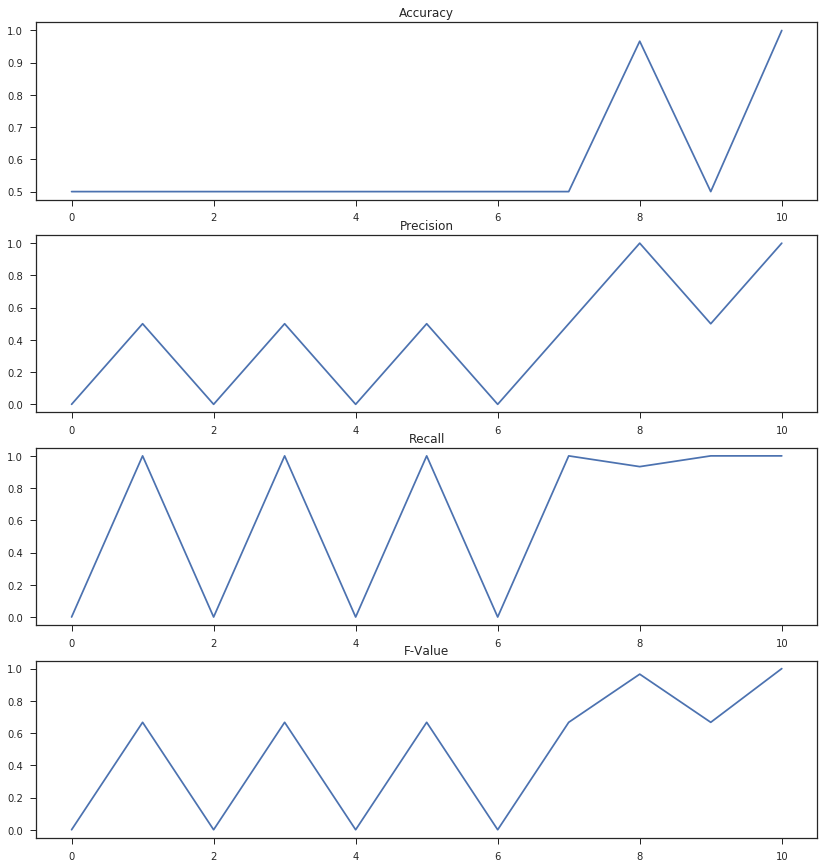

In [225]:
plt.figure(figsize=(14, 15))
t = range(len(accs))
ax = plt.subplot(411)
ax.set_title("Accuracy")
plt.plot(t, accs)

ax = plt.subplot(412)
ax.set_title("Precision")
plt.plot(t, pres)

ax = plt.subplot(413)
ax.set_title("Recall")
plt.plot(t, recs)

ax = plt.subplot(414)
ax.set_title("F-Value")
plt.plot(t, fs)
plt.show()